# 7. 데코레이터 알아보기

- 함수를 작성해서 처리할 때 다양한 기능의 함수를 추가할 경우가 있다. 이때 공통적으로 추가해야할 기능을 데코레이터 함수로 정의한후에 데코레이팅 처리가 가능하다
- 데코레이터를 사용하면 공통적인 기능을 묶어서 처리할 수 있다.


In [1]:
from IPython.display import Image

## 7-1 클로저 알아보기

- 함수 내에 내부 함수를 정의하고 이를 반환해서 처리할 때 기본 함수 내에 있는 변수를 내부함수에서 사용하는 환경이 구성됨
- 이때 원함수에 있는 지역변수들이 자유변수가 되어 내부함수가 유지될때까지 사용할 수 있다


###  기본 함수 내부에 내부함수를 정의하고 그대로 함수를 반환한다.

In [10]:
def outer(x) :
    print("outer", locals())
    def inner(y) :
        return x + y
    
    return inner

### 이 함수를 실행하면 내부함수가 반환되어 외부에서 사용할 수 있다

In [11]:
inner = outer(100)

outer {'x': 100}


In [12]:
inner

<function __main__.outer.<locals>.inner(y)>

### 반환된 내부함수를 실행하면 내부함수의 처리결과가 반환된다

In [13]:
inner(300)

400

## 7 -2 데코레이터 알아보기

- 데코레이터는 외부에 정의된 함수를 전달을 받아 내부 함수에서 처리하는 구조로 변환한다.


### 밖에 정의된 함수를 데코레이터 함수 내부에 저장하는 구조로 변환한다.

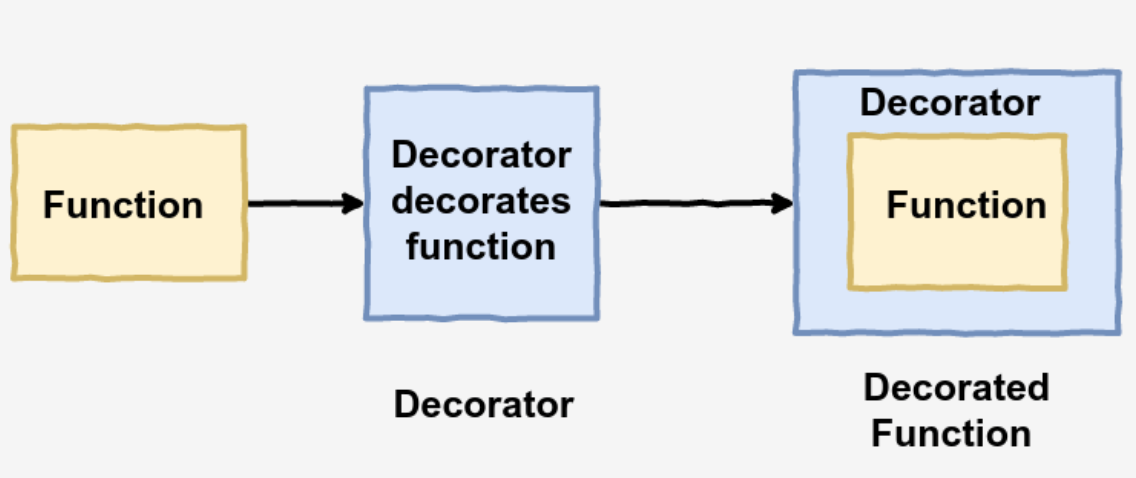

In [2]:
Image("./이미지/데코레이터.png", width=600, height=600)

### 실행함수를 하나 정의한다

In [14]:
def add(x,y) :
    print(" add  실행")
    return x+y

### 특정 기능을 가진 데코레이터 함수를 정의한다

In [15]:
def decorator(func) :
    def inner(x,y) :
        return func(x,y) 
    return inner

### 실행함수를 데코레이터함수로 데코레이팅을 처리한다

In [16]:
add_ = decorator(add)

### 데코레이터 함수의 매개변수가 클로저 환경 내에 자유변수로 지정된다.

In [21]:
add_.__closure__[0].cell_contents

<function __main__.add(x, y)>

### 내부 함수를 실행하면 내부에 저장된 실행함수가 호출되어 반환값을 처리한다

In [17]:
add_(100,300)

 add  실행


400

## 7-2 데코레이터 처리 기준

- 데코레이터 함수에 인자로 실행함수를 전달을 받는다.
- 데코레이터 함수가 실행되면 내부 함수가 반환된다.
- 내부함수는 실행함수의 인자를 받아서 실행함수에 인자로 전달하고 이를 실행한다.



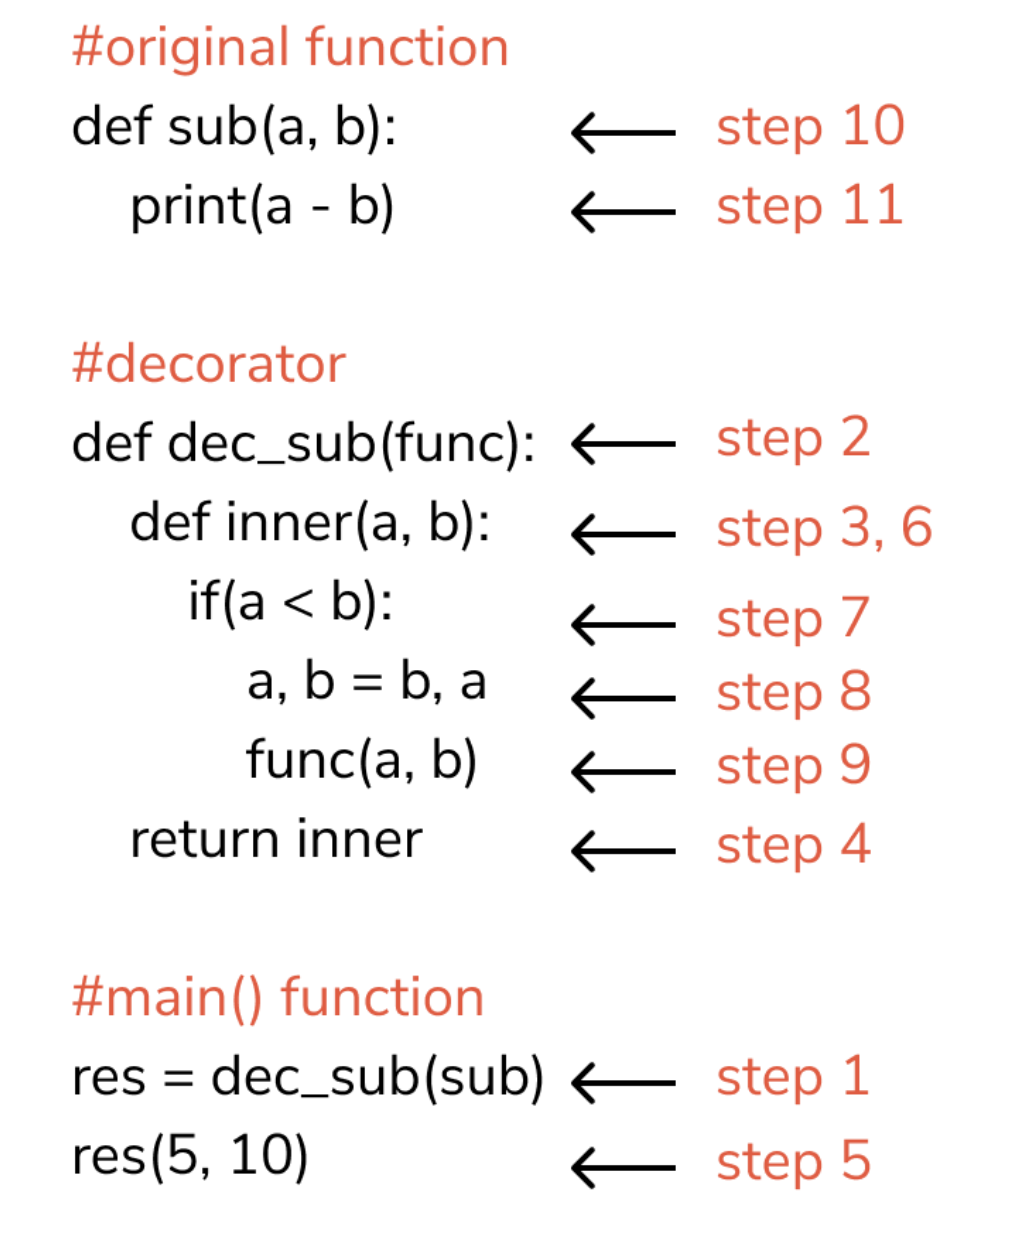

In [48]:
Image("./이미지/데코레이터처리순서.png", width=300, height=200)

## 7-3 데코레이터 표기법 

- 실행함수 위에 @표기법을 사용해서 데코레이터 처리


### 데코레이터 처리함수 내부에 매개변수 자료형을 처리

In [37]:
def typeCheck(func) :
    def inner(x,y) :
        if (isinstance(x, int) and isinstance(y,int)) :
            result = func(x,y)
        else :
            result = " type error "
        return result
    return inner

### 데코레이터 표기법은 실행함수 바로 위에서 데코레이터를 처리한다

In [38]:
@typeCheck
def mul(x,y) :
    print(' mul ')
    return x * y

### 반환되는 것은 내부 함수이다

In [39]:
mul.__name__

'inner'

### 실행은 내부함수 내에 있는 실행함수

In [40]:
mul(10,20)

 mul 


200

### 정수가 아닌 문자열을 넘었을 때 타입을 체크해서 오류라고 반환한다

In [41]:
mul(10,'2')

' type error '

## 7-4 실행함수의 정보를 전달하기

- 실행함수의 정보를 내부함수에 기록하기 위해서는 functools 모듈의 wraps 함수를 사용한다.



In [24]:
import functools as fts

In [25]:
fts.wraps

<function functools.wraps(wrapped, assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'), updated=('__dict__',))>

### 데코레이터 함수를 정의할 때 내부함수에 wraps 함수로 데코레이터로 처리해서 실행함수 정보를 전달한다

In [42]:
def typeCheck_(func) :
    @fts.wraps(func)
    def inner(x,y) :
        if (isinstance(x, int) and isinstance(y,int)) :
            result = func(x,y)
        else :
            result = " type error "
        return result
    return inner

In [43]:
@typeCheck_
def mul(x,y) :
    print(' mul ')
    return x * y

In [44]:
mul.__name__

'mul'

In [45]:
mul(100,300)

 mul 


30000